In [1]:
import lightgbm as lgb
import xgboost as xgb
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
this_dir = os.path.abspath('')
# feat_dir = os.path.join(this_dir, "new_feats_13_June")

# # data_train_path = os.path.join(this_dir, "train_new_feats_2.csv")
# # data_test_path = os.path.join(this_dir, "test_new_feats_2.csv")
# data_train_path = os.path.join(feat_dir, "train_diff_feats_xyz.csv")
# data_val_path = os.path.join(feat_dir, "val_diff_feats_xyz.csv")
# data_test_path = os.path.join(feat_dir, "test_diff_feats_xyz.csv")

In [3]:
# data_train = pd.read_csv('/home/tanyapohn/Documents/traffic-management/data/gen_features/checkpoint_1/train_feats.csv')
data_train = pd.read_csv('/home/tanyapohn/Documents/traffic-management/data/gen_features/checkpoint_2/train_feats_diff.csv')

In [4]:
# data_val = pd.read_csv('/home/tanyapohn/Documents/traffic-management/data/gen_features/val_t1_feats.csv')
data_val = pd.read_csv('./df_res.csv')

In [5]:
data_train.head()

,day,time,geohash6,demand,day_mod,consec_zeros,week_day,hour,minute,mean_demand_per_hour,median_demand_per_hour,mean_demand_per_week,median_demand_per_week,mean_demand_per_geo,median_demand_per_geo,x_coord,y_coord,z_coord,u_diff_lag,median_diff_lag,u_diff_lag_week,median_diff_lag_week,u_diff_lag_geo,median_diff_lag_geo,u_diff_rolling,u_diff_rolling_week,u_diff_rolling_geo
0,15,00:00:00,qp02yc,0.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.001842,0.0,0.000393,0.0,-5.678249,497.6783,-47.79192,0.0,0.0,-0.001842,0.0,-0.000393,0.0,0.0,-0.001842,-0.000393
1,15,00:15:00,qp02yc,0.0,15.0,1.0,1.0,0.0,15.0,0.0,0.0,0.001842,0.0,0.000393,0.0,-5.678249,497.6783,-47.79192,0.0,0.0,-0.001842,0.0,-0.000393,0.0,0.0,-0.001842,-0.000393
2,15,00:30:00,qp02yc,0.0,15.0,2.0,1.0,0.0,30.0,0.0,0.0,0.001842,0.0,0.000393,0.0,-5.678249,497.6783,-47.79192,0.0,0.0,-0.001842,0.0,-0.000393,0.0,0.0,-0.001842,-0.000393
3,15,00:45:00,qp02yc,0.0,15.0,3.0,1.0,0.0,45.0,0.0,0.0,0.001842,0.0,0.000393,0.0,-5.678249,497.6783,-47.79192,0.0,0.0,-0.001842,0.0,-0.000393,0.0,0.0,-0.001842,-0.000393
4,15,01:00:00,qp02yc,0.0,15.0,4.0,1.0,1.0,0.0,0.0,0.0,0.001842,0.0,0.000459,0.0,-5.678249,497.6783,-47.79192,0.0,0.0,-0.001842,0.0,-0.000459,0.0,0.0,-0.001842,-0.000459


In [6]:
data_val.head()

,geohash6,day,demand,time,day_mod,week_day,hour,minute,consec_zeros,mean_demand_per_hour,median_demand_per_hour,mean_demand_per_week,median_demand_per_week,mean_demand_per_geo,median_demand_per_geo,x_coord,y_coord,z_coord,y_pred,u_diff_lag,median_diff_lag,u_diff_lag_week,median_diff_lag_week,u_diff_lag_geo,median_diff_lag_geo,u_diff_rolling,u_diff_rolling_week,u_diff_rolling_geo
0,qp02yc,47,0.014581,03:00:00,16.0,5.0,3.0,0.0,11.0,0.001829,0.0,0.002137,0.0,0.003987,0.0,-5.678249,497.6783,-47.79192,0.016784,-0.001829,0.000000,-0.002137,0.000000,-0.003987,0.000000,-0.001829,-0.002137,-0.003987
1,qp02yc,47,0.006749,03:15:00,16.0,5.0,3.0,15.0,12.0,0.001829,0.0,0.002137,0.0,0.003987,0.0,-5.678249,497.6783,-47.79192,0.016784,0.014956,0.016784,0.014647,0.016784,0.012798,0.016784,-0.001829,-0.002137,-0.003987
2,qp02yc,47,0.009923,04:15:00,16.0,5.0,4.0,15.0,16.0,0.008423,0.0,0.002137,0.0,0.006314,0.0,-5.678249,497.6783,-47.79192,0.020441,-0.008423,0.000000,-0.002137,0.000000,-0.006314,0.000000,-0.008423,-0.002137,-0.006314
3,qp02yc,47,0.021440,04:30:00,16.0,5.0,4.0,30.0,17.0,0.008423,0.0,0.002137,0.0,0.006314,0.0,-5.678249,497.6783,-47.79192,0.020441,0.012018,0.020441,0.018304,0.020441,0.014127,0.020441,-0.008423,-0.002137,-0.006314
4,qp02yc,47,0.007095,04:45:00,16.0,5.0,4.0,45.0,18.0,0.008423,0.0,0.002137,0.0,0.006314,0.0,-5.678249,497.6783,-47.79192,0.020441,0.012018,0.020441,0.018304,0.020441,0.014127,0.020441,0.012018,0.018304,0.014127


In [4]:
# data_test = pd.read_csv(data_test_path, index_col=[0])

In [7]:
data_val = data_val.fillna(0)

In [6]:
# data_test = data_test.fillna(0)

In [5]:
X_train = data_train.drop(['geohash6','time','demand', 'day'],axis=1)
y_train = data_train['demand']

X_val = data_val.drop(['geohash6','time', 'day', 'demand'],axis=1)
y_val = data_val['demand']

# X_test = data_test.drop(['geohash6','time','demand'],axis=1)
# y_test = data_test['demand']

In [6]:
X_train.columns.values

array(['day_mod', 'consec_zeros', 'week_day', 'hour', 'minute',
       'mean_demand_per_hour', 'median_demand_per_hour',
       'mean_demand_per_week', 'median_demand_per_week',
       'mean_demand_per_geo', 'median_demand_per_geo', 'x_coord',
       'y_coord', 'z_coord', 'u_diff_lag', 'median_diff_lag',
       'u_diff_lag_week', 'median_diff_lag_week', 'u_diff_lag_geo',
       'median_diff_lag_geo', 'u_diff_rolling', 'u_diff_rolling_week',
       'u_diff_rolling_geo'], dtype=object)

In [9]:
cols =  X_train.columns.values
X_val = X_val[cols]
# data_test = data_test[cols]

In [10]:
%%time
xgb_reg = xgb.XGBRegressor(n_estimators=160, learning_rate=0.2, objective = 'reg:squarederror', booster ='dart')
xgb_reg.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_val, y_val)], 
            eval_metric = 'rmse', early_stopping_rounds=30)

/home/tanyapohn/.local/share/virtualenvs/traffic-management-vd3_-FoE/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/tanyapohn/.local/share/virtualenvs/traffic-management-vd3_-FoE/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:0.36848	validation_1-rmse:0.339551
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 30 rounds.
[1]	validation_0-rmse:0.295032	validation_1-rmse:0.272315
[2]	validation_0-rmse:0.23676	validation_1-rmse:0.218685
[3]	validation_0-rmse:0.189555	validation_1-rmse:0.178243
[4]	validation_0-rmse:0.155387	validation_1-rmse:0.146267
[5]	validation_0-rmse:0.125342	validation_1-rmse:0.121805
[6]	validation_0-rmse:0.100641	validation_1-rmse:0.103922
[7]	validation_0-rmse:0.082011	validation_1-rmse:0.09088
[8]	validation_0-rmse:0.067018	validation_1-rmse:0.080819
[9]	validation_0-rmse:0.054474	validation_1-rmse:0.074361
[10]	validation_0-rmse:0.045572	validation_1-rmse:0.069411
[11]	validation_0-rmse:0.039323	validation_1-rmse:0.06632
[12]	validation_0-rmse:0.033804	validation_1-rmse:0.064142
[13]	validation_0-rmse:0.029213	validation_1-rmse:0.062802
[14]	validation_0-rmse:0.0268

#### [99]	validation_0-rmse:0.016281	validation_1-rmse:0.0259
#### [199]	validation_0-rmse:0.015483	validation_1-rmse:0.025072	validation_2-rmse:0.025186
#### [162]	validation_0-rmse:0.015665	validation_1-rmse:0.025097

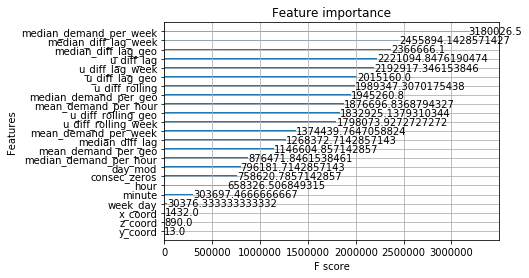

In [17]:
xgb.plot_importance(xgb_reg,importance_type='cover', max_num_features=45)
plt.show()

In [11]:
# xgb_reg.save_model(os.path.join(this_dir, "model_xgb/xgb_t_plus_1_2.model"))

In [18]:
y_pred = xgb_reg.predict(X_val, ntree_limit=xgb_reg.best_iteration)

In [28]:
y_pred.shape

(1061208,)

In [44]:
import gc
def gen_diff_features(df: pd.DataFrame) -> pd.DataFrame:

    df = df.sort_values(by=['geohash6', 'day', 'time'])
    df = df.reset_index(drop=True)

    lag_feat = df[['day', 'time', 'geohash6', 'y_pred']].copy()
    lag_feat = lag_feat.set_index(['day', 'time', 'geohash6'])
    lag_feat = lag_feat.unstack().shift(1)  # pull out the groups, shift with lag step=1
    lag_feat = lag_feat.stack(dropna=False)
    lag_feat = lag_feat.reset_index()
    lag_feat.rename(columns={'y_pred': 'lag_demand_1'}, inplace=True)

    tmp2 = pd.merge(df, lag_feat, how='inner', on=['day', 'time', 'geohash6'])

    tmp2['lag_demand_1'] = tmp2['lag_demand_1'].fillna(0)
    series_test_lag_diff = tmp2['lag_demand_1']
    del tmp2
    gc.collect()

    roll_feat = df[['day', 'time', 'geohash6', 'y_pred']].copy()
    roll_feat = roll_feat.set_index(['day', 'time', 'geohash6'])
    roll_feat = roll_feat.unstack().rolling(3).mean()  # pull out the groups, shift with lag step=1
    roll_feat = roll_feat.stack(dropna=False)
    roll_feat = roll_feat.reset_index()
    roll_feat.rename(columns={'y_pred': 'roll_demand'}, inplace=True)

    tmp3 = pd.merge(df, roll_feat, how='inner', on=['day', 'time', 'geohash6'])
    tmp3['roll_demand'] = tmp3['roll_demand'].fillna(0)
    series_test_rolling_diff = tmp3['roll_demand']

    df['u_diff_lag'] = series_test_lag_diff - df['mean_demand_per_hour']
    df['median_diff_lag'] = series_test_lag_diff - df['median_demand_per_hour']
    # ----------------------
    df['u_diff_lag_week'] = series_test_lag_diff - df['mean_demand_per_week']
    df['median_diff_lag_week'] = series_test_lag_diff - df['median_demand_per_week']
    # ---------------------
    df['u_diff_lag_geo'] = series_test_lag_diff - df['mean_demand_per_geo']
    df['median_diff_lag_geo'] = series_test_lag_diff - df['median_demand_per_geo']
    # ----------------------
    df['u_diff_rolling'] = series_test_rolling_diff - df['mean_demand_per_hour']
    df['u_diff_rolling_week'] = series_test_rolling_diff - df['mean_demand_per_week']
    df['u_diff_rolling_geo'] = series_test_rolling_diff - df['mean_demand_per_geo']

    del tmp3, roll_feat, lag_feat
    gc.collect()

    return df

In [20]:
X_val.head()

,day_mod,consec_zeros,week_day,hour,minute,mean_demand_per_hour,median_demand_per_hour,mean_demand_per_week,median_demand_per_week,mean_demand_per_geo,median_demand_per_geo,x_coord,y_coord,z_coord
0,20.0,1.0,2.0,20.0,45.0,0.003515,0.001619,0.095897,0.081543,0.003124,0.000177,-5.488094,497.744136,-47.123833
1,17.0,0.0,6.0,6.0,15.0,0.073520,0.067849,0.049256,0.048005,0.092848,0.086158,-6.633853,497.766185,-46.742031
2,21.0,0.0,3.0,11.0,45.0,0.153919,0.154569,0.087696,0.080602,0.127003,0.119403,-5.774834,497.776892,-46.742031
3,17.0,0.0,6.0,11.0,30.0,0.025721,0.024322,0.021948,0.020869,0.037955,0.036806,-5.297355,497.759737,-46.980661
4,25.0,0.0,0.0,10.0,0.0,0.037505,0.032481,0.021091,0.013350,0.031181,0.028723,-6.728751,497.724390,-47.171557


In [30]:
y_pred_series = pd.Series(y_pred, name='y_pred')

In [33]:
df_res = pd.concat([data_val.drop(['y_pred'],axis=1), y_pred_series], axis=1)

In [34]:
df_res.head()

,geohash6,day,demand,time,day_mod,week_day,hour,minute,consec_zeros,mean_demand_per_hour,median_demand_per_hour,mean_demand_per_week,median_demand_per_week,mean_demand_per_geo,median_demand_per_geo,x_coord,y_coord,z_coord,u_diff_lag,median_diff_lag,u_diff_lag_week,median_diff_lag_week,u_diff_lag_geo,median_diff_lag_geo,u_diff_rolling,u_diff_rolling_week,u_diff_rolling_geo,y_pred
0,qp02yc,47,0.014581,03:00:00,16.0,5.0,3.0,0.0,11.0,0.001829,0.0,0.002137,0.0,0.003987,0.0,-5.678249,497.6783,-47.79192,-0.001829,0.000000,-0.002137,0.000000,-0.003987,0.000000,-0.001829,-0.002137,-0.003987,0.000636
1,qp02yc,47,0.006749,03:15:00,16.0,5.0,3.0,15.0,12.0,0.001829,0.0,0.002137,0.0,0.003987,0.0,-5.678249,497.6783,-47.79192,0.014956,0.016784,0.014647,0.016784,0.012798,0.016784,-0.001829,-0.002137,-0.003987,-0.002228
2,qp02yc,47,0.009923,04:15:00,16.0,5.0,4.0,15.0,16.0,0.008423,0.0,0.002137,0.0,0.006314,0.0,-5.678249,497.6783,-47.79192,-0.008423,0.000000,-0.002137,0.000000,-0.006314,0.000000,-0.008423,-0.002137,-0.006314,0.000433
3,qp02yc,47,0.021440,04:30:00,16.0,5.0,4.0,30.0,17.0,0.008423,0.0,0.002137,0.0,0.006314,0.0,-5.678249,497.6783,-47.79192,0.012018,0.020441,0.018304,0.020441,0.014127,0.020441,-0.008423,-0.002137,-0.006314,-0.004314
4,qp02yc,47,0.007095,04:45:00,16.0,5.0,4.0,45.0,18.0,0.008423,0.0,0.002137,0.0,0.006314,0.0,-5.678249,497.6783,-47.79192,0.012018,0.020441,0.018304,0.020441,0.014127,0.020441,0.012018,0.018304,0.014127,0.023517


In [47]:
# df_res = gen_diff_features(df_res)

In [48]:
# df_res.head()

,geohash6,day,demand,time,day_mod,week_day,hour,minute,consec_zeros,mean_demand_per_hour,median_demand_per_hour,mean_demand_per_week,median_demand_per_week,mean_demand_per_geo,median_demand_per_geo,x_coord,y_coord,z_coord,y_pred,u_diff_lag,median_diff_lag,u_diff_lag_week,median_diff_lag_week,u_diff_lag_geo,median_diff_lag_geo,u_diff_rolling,u_diff_rolling_week,u_diff_rolling_geo
0,qp02yc,47,0.014581,03:00:00,16.0,5.0,3.0,0.0,11.0,0.001829,0.0,0.002137,0.0,0.003987,0.0,-5.678249,497.6783,-47.79192,0.016784,-0.001829,0.000000,-0.002137,0.000000,-0.003987,0.000000,-0.001829,-0.002137,-0.003987
1,qp02yc,47,0.006749,03:15:00,16.0,5.0,3.0,15.0,12.0,0.001829,0.0,0.002137,0.0,0.003987,0.0,-5.678249,497.6783,-47.79192,0.016784,0.014956,0.016784,0.014647,0.016784,0.012798,0.016784,-0.001829,-0.002137,-0.003987
2,qp02yc,47,0.009923,04:15:00,16.0,5.0,4.0,15.0,16.0,0.008423,0.0,0.002137,0.0,0.006314,0.0,-5.678249,497.6783,-47.79192,0.020441,-0.008423,0.000000,-0.002137,0.000000,-0.006314,0.000000,-0.008423,-0.002137,-0.006314
3,qp02yc,47,0.021440,04:30:00,16.0,5.0,4.0,30.0,17.0,0.008423,0.0,0.002137,0.0,0.006314,0.0,-5.678249,497.6783,-47.79192,0.020441,0.012018,0.020441,0.018304,0.020441,0.014127,0.020441,-0.008423,-0.002137,-0.006314
4,qp02yc,47,0.007095,04:45:00,16.0,5.0,4.0,45.0,18.0,0.008423,0.0,0.002137,0.0,0.006314,0.0,-5.678249,497.6783,-47.79192,0.020441,0.012018,0.020441,0.018304,0.020441,0.014127,0.020441,0.012018,0.018304,0.014127


In [49]:
# df_res.to_csv('./df_res.csv', index=False)

In [35]:
location=data_val['geohash6'].unique()

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

In [44]:
rmse_per_geo = []

In [46]:
np.mean(rmse_per_geo)

0.0356192487845579

In [29]:
# np.mean(rmse_per_geo)

0.035801546145124125

In [191]:
# np.mean(rmse_per_geo) # with abs

0.01856225524207555

In [45]:
for i in location:
    tmp = df_res[df_res['geohash6'] == i]
    rms = sqrt(mean_squared_error(tmp['demand'], abs(tmp['y_pred'])))
    rmse_per_geo.append(rms)
    print(i+" rmse:" +str(rms))

qp02yc rmse:0.028309386737557726
qp02yf rmse:0.028496808479118126
qp02yu rmse:0.02920944434790466
qp02yv rmse:0.0072394906676869816
qp02yy rmse:0.020875821372589514
qp02yz rmse:0.03518775983039721
qp02z1 rmse:0.04243095360343651
qp02z3 rmse:0.041412840490660276
qp02z4 rmse:0.028322152012477297
qp02z5 rmse:0.0509552062008912
qp02z6 rmse:0.06571333515940242
qp02z7 rmse:0.0625701276381358
qp02z9 rmse:0.03746410353737882
qp02zc rmse:0.0493950590656725
qp02zd rmse:0.0543612212779874
qp02ze rmse:0.07412887688337128
qp02zf rmse:0.210442779589747
qp02zg rmse:0.047895870135151945
qp02zh rmse:0.12920344185960883
qp02zj rmse:0.17885201860365407
qp02zk rmse:0.043921797741584404
qp02zm rmse:0.06906551258460239
qp02zn rmse:0.10473124010745814
qp02zp rmse:0.06639460148009194
qp02zq rmse:0.06384425795313552
qp02zr rmse:0.09739191352615954
qp02zs rmse:0.07145876609286764
qp02zt rmse:0.1454728894520489
qp02zu rmse:0.04714097433201933
qp02zv rmse:0.07344798575879738
qp02zw rmse:0.15253566975347943
qp02zx

qp03xs rmse:0.09559011952351787
qp03xt rmse:0.12096546902893308
qp03xu rmse:0.039330347247497614
qp03xv rmse:0.08230851504687912
qp03xw rmse:0.0853465640685492
qp03xx rmse:0.08623832586428788
qp03xy rmse:0.1348473303534423
qp03xz rmse:0.097629670920639
qp03y0 rmse:0.01274441513435594
qp03y1 rmse:0.013284356665277901
qp03y2 rmse:0.018947722695888337
qp03y3 rmse:0.011695007998066458
qp03y4 rmse:0.007666159331426687
qp03y5 rmse:0.002017660207689894
qp03y6 rmse:0.01914418351589452
qp03y7 rmse:0.02261797764773025
qp03y8 rmse:0.03563293077700676
qp03y9 rmse:0.028235138506944767
qp03yb rmse:0.09758979262846755
qp03yc rmse:0.05445992938806124
qp03yd rmse:0.028840268481914476
qp03ye rmse:0.02416929557874828
qp03yf rmse:0.027559615305710106
qp03yg rmse:0.11217291879122104
qp03yh rmse:0.0026942801471379037
qp03yk rmse:0.019844196784705545
qp03ym rmse:0.016273781567612493
qp03yn rmse:0.001930388392538937
qp03yq rmse:0.012536770925398321
qp03yr rmse:0.005844639394633701
qp03ys rmse:0.02977364406246

qp092z rmse:0.012680636864659088
qp0930 rmse:0.01405139016755955
qp0931 rmse:0.00811937803443648
qp0932 rmse:0.016503550805357727
qp0933 rmse:0.01419331746913415
qp0934 rmse:0.010200263531152476
qp0935 rmse:0.005503982646589304
qp0936 rmse:0.013730874589878577
qp0937 rmse:0.012374007597671401
qp0938 rmse:0.019782748044336988
qp0939 rmse:0.005217898702822155
qp093b rmse:0.04959043459078686
qp093c rmse:0.030925566316410805
qp093d rmse:0.01936772812889373
qp093e rmse:0.023992827869385624
qp093f rmse:0.014174003424065934
qp093g rmse:0.05131955111867796
qp093h rmse:0.008331447506717202
qp093j rmse:0.007160118580285029
qp093k rmse:0.004907831345619808
qp093m rmse:0.010441632332790544
qp093n rmse:0.005961580803227895
qp093p rmse:0.02185952692332406
qp093q rmse:0.02906058421398205
qp093r rmse:0.03744451987347206
qp093s rmse:0.015939651720047236
qp093t rmse:0.014406553266402994
qp093u rmse:0.028809987238194144
qp093v rmse:0.0308123337207607
qp093w rmse:0.053789018949662405
qp093x rmse:0.0574274

qp09ck rmse:0.00990230066114401
qp09cm rmse:0.023825751300526696
qp09cn rmse:0.014518533528381724
qp09cp rmse:0.013883311574312475
qp09cq rmse:0.0389684985913264
qp09cr rmse:0.012305572368415297
qp09cs rmse:0.009353779360848505
qp09ct rmse:0.034205031296735564
qp09cu rmse:0.028215025428553343
qp09cv rmse:0.04258241262679937
qp09cw rmse:0.014310635130632068
qp09cx rmse:0.014809463958879205
qp09cy rmse:0.020582442518503944
qp09cz rmse:0.008287377879245718
qp09d0 rmse:0.00842519377192685
qp09d1 rmse:0.025256710992087514
qp09d2 rmse:0.12302979205580215
qp09d3 rmse:0.14725922146629505
qp09d4 rmse:0.02784114705506437
qp09d5 rmse:0.07217586488890282
qp09d6 rmse:0.0942320854960209
qp09d7 rmse:0.06257588427369433
qp09d8 rmse:0.17139426229445137
qp09d9 rmse:0.15727374517437162
qp09db rmse:0.11101098364015263
qp09dc rmse:0.11093771273528612
qp09dd rmse:0.06593120216573287
qp09de rmse:0.10070503581185203
qp09df rmse:0.05795688239239446
qp09dg rmse:0.04604610495516485
qp09dh rmse:0.0715350152700476

qp09s1 rmse:0.011529252859053188
qp09s2 rmse:0.016971232397405445
qp09s3 rmse:0.018319159926033845
qp09s4 rmse:0.010243315476394673
qp09s6 rmse:0.05150671422297281
qp09s7 rmse:0.05589230899192374
qp09s8 rmse:0.07930588660796051
qp09s9 rmse:0.07541931110171816
qp09sb rmse:0.03267120846076765
qp09sc rmse:0.022554970334536403
qp09sd rmse:0.053778657818713646
qp09se rmse:0.05528336666898194
qp09sf rmse:0.03151856415264234
qp09sg rmse:0.02300084038337306
qp09sh rmse:0.04565874021061681
qp09sj rmse:0.030520048465052654
qp09sk rmse:0.04159681618205219
qp09sm rmse:0.034873069717355085
qp09sn rmse:0.05787461284643682
qp09sp rmse:0.08392870691679609
qp09sq rmse:0.03007474508087952
qp09sr rmse:0.04926342310538833
qp09ss rmse:0.041368175479319036
qp09st rmse:0.022711248697512825
qp09su rmse:0.024214489221054153
qp09sv rmse:0.016163372839971577
qp09sw rmse:0.039253453797115104
qp09sx rmse:0.04631570315179254
qp09sy rmse:0.024497336886724088
qp09sz rmse:0.046940303332448925
qp09t0 rmse:0.05830983198

qp0dhw rmse:0.03329274717266639
qp0dhy rmse:0.009677951565369571
qp0dj0 rmse:0.05843546150729748
qp0dj1 rmse:0.052714597636560764
qp0dj2 rmse:0.014750904646382169
qp0dj3 rmse:0.013751133247351353
qp0dj4 rmse:0.027605287882896262
qp0dj5 rmse:0.029462834421531556
qp0dj6 rmse:0.023310147304139526
qp0dj7 rmse:0.033109406990812724
qp0dj8 rmse:0.012362091724137493
qp0dj9 rmse:0.012822812829780676
qp0djb rmse:0.01016039043477745
qp0djc rmse:0.014239018864534813
qp0djd rmse:0.013224920164648166
qp0dje rmse:0.014649226573425234
qp0djf rmse:0.008552858978115752
qp0djg rmse:0.012395168495028305
qp0djh rmse:0.02336642031960574
qp0djj rmse:0.015814857849997324
qp0djk rmse:0.020856624205245547
qp0djm rmse:0.025374722627837486
qp0djn rmse:0.010540207640389524
qp0djq rmse:0.021847283585069977
qp0djs rmse:0.01326102804121168
qp0djt rmse:0.013704641786168583
qp0dju rmse:0.025116292969957724
qp0djv rmse:0.012921879152402239
qp0djw rmse:0.011368188167781942
qp0djy rmse:0.025421896367375466
qp0dn0 rmse:0.0

In [42]:
# df_res[df_res['geohash6'] == 'qp02yc']

In [33]:
# xgb_reg.save_model(os.path.join(this_dir, "model_xgb/xgb_xyz.model"))

In [98]:
sns.set_style("darkgrid")

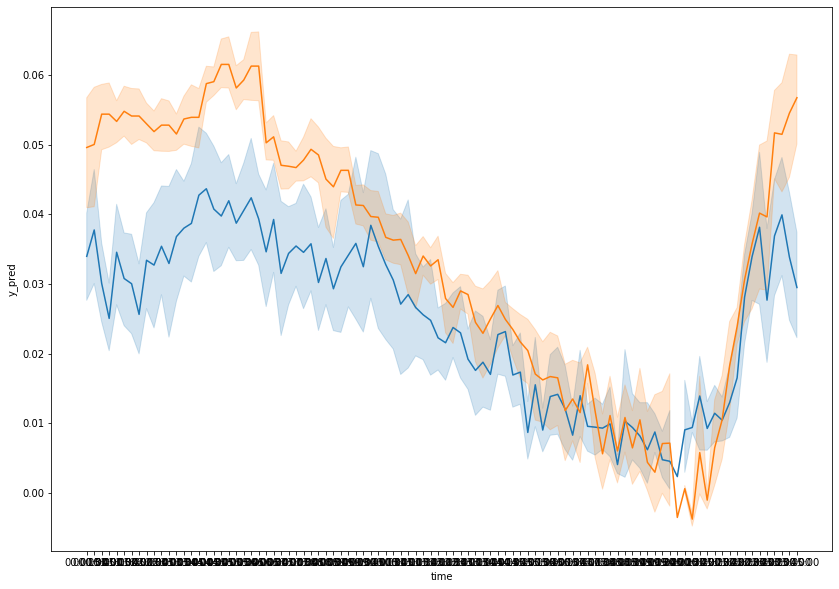

In [40]:
plt.figure(figsize=(14,10))
sns.lineplot(data=df_res[df_res['geohash6'] == 'qp03zs'], x='time', y='demand')
sns.lineplot(data=df_res[df_res['geohash6'] == 'qp03zs'], x='time', y='y_pred')